In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cardio Good Fitness
##### Cardio Good Fitness is a retail store and this data is of customers who brought various treadmill models.

In [2]:
cardiodata=pd.read_csv("CardioGoodFitness.csv")
cardiodata.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [3]:
cardiodata.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [4]:
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Objective

###### Come up with a customer profile (characteristics of a customer) of the different products
###### Based on the data we have to generate a set of insights and recommendations that will help the company in targetting new customers

In [5]:
cardiodata.isna().sum()
# no missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
cardiodata.shape #180 rows and 9 columns 

(180, 9)

In [7]:
cardiodata.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [8]:
for i in cardiodata.columns:
    print(i)
    print(cardiodata[i].unique())

Product
['TM195' 'TM498' 'TM798']
Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender
['Male' 'Female']
Education
[14 15 12 13 16 18 20 21]
MaritalStatus
['Single' 'Partnered']
Usage
[3 2 4 5 6 7]
Fitness
[4 3 2 1 5]
Income
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [9]:
cardiodata.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [10]:
cardiodata.Gender.value_counts()



Male      104
Female     76
Name: Gender, dtype: int64

In [11]:
cardiodata.Education.value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

In [12]:
cardiodata.MaritalStatus.value_counts()


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [13]:
cardiodata.Fitness.value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='Product', ylabel='Income'>

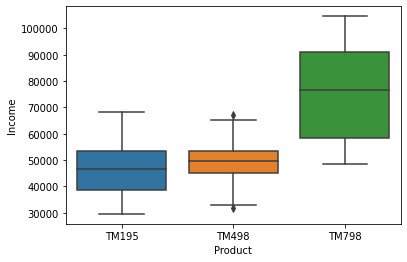

In [15]:
sns.boxplot(x='Product',y='Income',data=cardiodata)

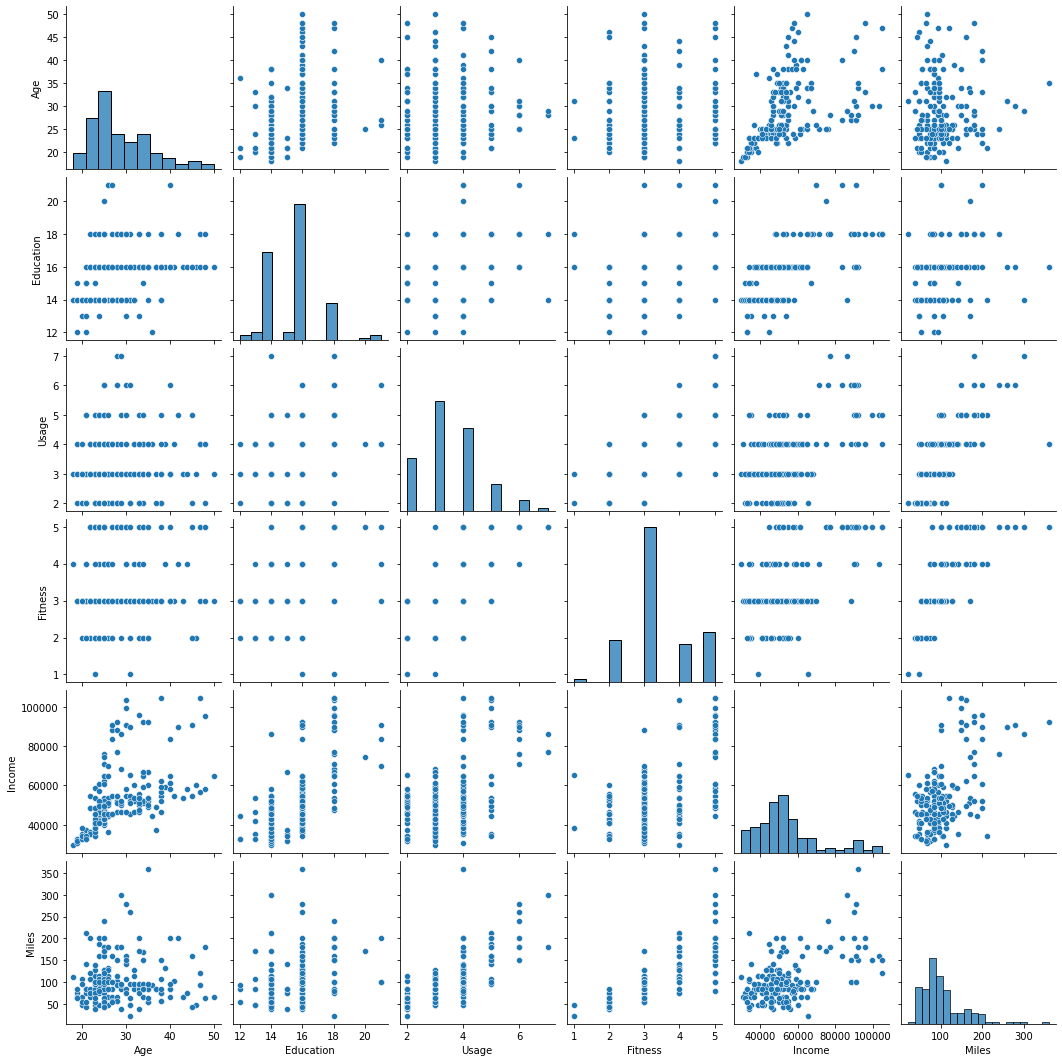

In [16]:
sns.pairplot(cardiodata)

In [17]:
corr=cardiodata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [18]:
pd.crosstab(cardiodata['Product'],cardiodata['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [19]:
pd.crosstab(cardiodata['Product'],cardiodata['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot:>

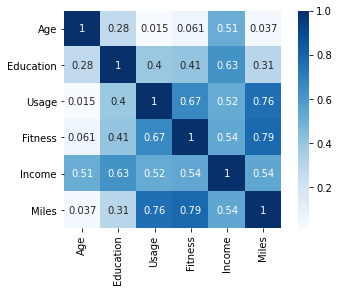

In [20]:
sns.heatmap(corr,square=True,annot=True,cmap='Blues')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [22]:
categorical_cols=['MaritalStatus','Product','Gender']
for col in categorical_cols:
    cardiodata[col] = cardiodata[col].astype('category')
    
cardiodata.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [23]:
cleanup_nums = {"Gender":     {"Male": 1, "Female": 2}}

cardiodata=cardiodata.replace(cleanup_nums )
cardiodata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,1,14,Single,3,4,29562,112
1,TM195,19,1,15,Single,2,3,31836,75
2,TM195,19,2,14,Partnered,4,3,30699,66
3,TM195,19,1,12,Single,3,3,32973,85
4,TM195,20,1,13,Partnered,4,2,35247,47


In [24]:
cleanup_nums = {"Product":     {"TM195": 1, "TM498": 2, "TM798": 3 }}

cardiodata=cardiodata.replace(cleanup_nums )
cardiodata.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,1,18,1,14,Single,3,4,29562,112
1,1,19,1,15,Single,2,3,31836,75
2,1,19,2,14,Partnered,4,3,30699,66
3,1,19,1,12,Single,3,3,32973,85
4,1,20,1,13,Partnered,4,2,35247,47


In [25]:
cardiodata.Product.unique()

array([1, 2, 3], dtype=int64)

In [26]:
cleanup_nums1 = {"MaritalStatus":     {"Single": 1, "Partnered": 2}}
cardiodata=cardiodata.replace(cleanup_nums1 )
cardiodata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,1,18,1,14,1,3,4,29562,112
1,1,19,1,15,1,2,3,31836,75
2,1,19,2,14,2,4,3,30699,66
3,1,19,1,12,1,3,3,32973,85
4,1,20,1,13,2,4,2,35247,47


In [27]:
cardiodata.dtypes

Product          int64
Age              int64
Gender           int64
Education        int64
MaritalStatus    int64
Usage            int64
Fitness          int64
Income           int64
Miles            int64
dtype: object

#### Products are our target variables 
###### that means we have to design a model to predict about products  

In [28]:
X=cardiodata.drop('Product', axis=1)
y=cardiodata['Product'] # because products are our target variables 
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=42,shuffle=y)

In [29]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(162, 8)
(18, 8)
(162,)
(18,)


In [30]:
X_train=pd.DataFrame(X_train,columns=['Income','Miles','Gender','MaritalStatus','Usage','Fitness'])
X_val=pd.DataFrame(X_val,columns=['Income','Miles','Gender','MaritalStatus','Usage','Fitness'])


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train , y_train)
knn_y_preds=knn_clf.predict(X_val)
acc =accuracy_score(y_val,knn_y_preds)
print( 'accuracy= ' , round(acc * 100 , 2 ), '%')

accuracy=  44.44 %


In [32]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr.coef_

array([ 1.96770993e-05,  1.74319243e-03, -7.45856617e-02, -1.04243596e-01,
        5.59595682e-02,  1.53081267e-01])

In [33]:
predictions = lr.predict(X_val)
score= lr.score(X_val,y_val)
round(score * 100 ,3 )

#calculate R2 value of our model 

52.573

In [34]:
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product        180 non-null    int64
 1   Age            180 non-null    int64
 2   Gender         180 non-null    int64
 3   Education      180 non-null    int64
 4   MaritalStatus  180 non-null    int64
 5   Usage          180 non-null    int64
 6   Fitness        180 non-null    int64
 7   Income         180 non-null    int64
 8   Miles          180 non-null    int64
dtypes: int64(9)
memory usage: 12.8 KB


In [35]:
cardiodata.head(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,1,18,1,14,1,3,4,29562,112
1,1,19,1,15,1,2,3,31836,75
2,1,19,2,14,2,4,3,30699,66
3,1,19,1,12,1,3,3,32973,85
4,1,20,1,13,2,4,2,35247,47
5,1,20,2,14,2,3,3,32973,66
6,1,21,2,14,2,3,3,35247,75
7,1,21,1,13,1,3,3,32973,85
8,1,21,1,15,1,5,4,35247,141
9,1,21,2,15,2,2,3,37521,85


### Education and miles

In [36]:
#binnig 
cardiodata.Education.unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [37]:
def education_year(x):
    if x > 10 and x < 15:
        x= 'fairly educated'
    elif x > 15 and x < 20:
        x='educated'
    else:
        x= 'most educated'
    return x


cardiodata['Education_category']=cardiodata['Education'].map(education_year)

cardiodata['Education_category'].unique()

array(['fairly educated', 'most educated', 'educated'], dtype=object)

In [38]:
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             180 non-null    int64 
 1   Age                 180 non-null    int64 
 2   Gender              180 non-null    int64 
 3   Education           180 non-null    int64 
 4   MaritalStatus       180 non-null    int64 
 5   Usage               180 non-null    int64 
 6   Fitness             180 non-null    int64 
 7   Income              180 non-null    int64 
 8   Miles               180 non-null    int64 
 9   Education_category  180 non-null    object
dtypes: int64(9), object(1)
memory usage: 14.2+ KB


In [39]:
mean=[]

for i in cardiodata['Education_category'].unique():
    mean.append(cardiodata['Miles'][cardiodata['Education_category']==i].mean()) 
mean 

[89.68253968253968, 110.44444444444444, 110.47222222222223]

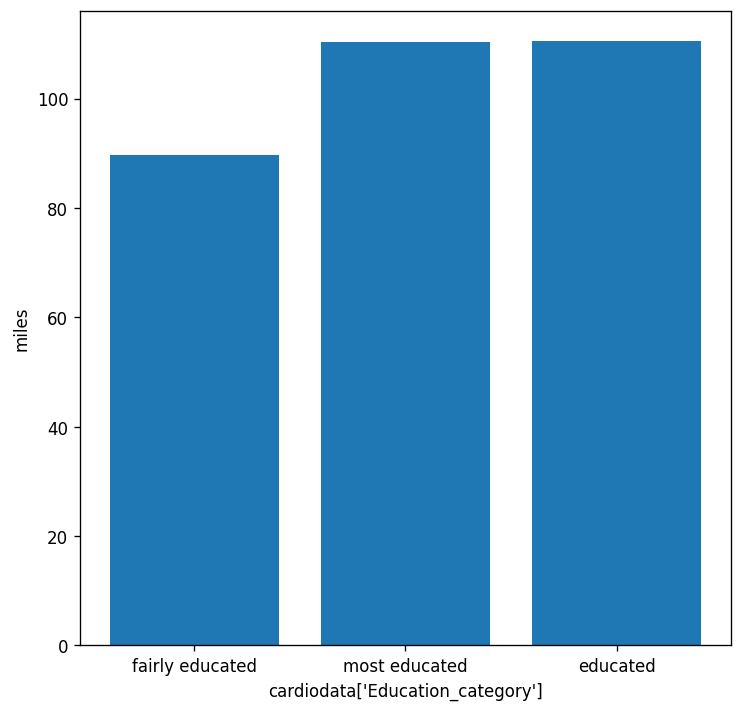

In [40]:
plt.figure(figsize=(7,7), dpi=120)
plt.bar(cardiodata['Education_category'].unique(), mean)

plt.xlabel("cardiodata['Education_category']")
plt.ylabel("miles")
plt.show()

In [41]:
cardiodata.head(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_category
0,1,18,1,14,1,3,4,29562,112,fairly educated
1,1,19,1,15,1,2,3,31836,75,most educated
2,1,19,2,14,2,4,3,30699,66,fairly educated
3,1,19,1,12,1,3,3,32973,85,fairly educated
4,1,20,1,13,2,4,2,35247,47,fairly educated
5,1,20,2,14,2,3,3,32973,66,fairly educated
6,1,21,2,14,2,3,3,35247,75,fairly educated
7,1,21,1,13,1,3,3,32973,85,fairly educated
8,1,21,1,15,1,5,4,35247,141,most educated
9,1,21,2,15,2,2,3,37521,85,most educated
